In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
plt.style.use('fivethirtyeight')

## Network
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab as plt
from itertools import count
from operator import itemgetter
from networkx.drawing.nx_agraph import graphviz_layout
import pylab

In [ ]:
df = pd.read_csv('/content/sample_data/member-edges.csv')
print(len(df))

1176368


In [ ]:
df = pd.read_csv('/content/sample_data/soc-sign-bitcoinotc.csv')
print(len(df))

35591


In [ ]:
df

,6,2,4,1289241911.72836
0,6,5,2,1.289242e+09
1,1,15,1,1.289243e+09
2,4,3,7,1.289245e+09
3,13,16,8,1.289254e+09
4,13,10,8,1.289254e+09
...,...,...,...,...
35586,4499,1810,1,1.453612e+09
35587,2731,3901,5,1.453679e+09
35588,2731,4897,5,1.453679e+09
35589,13,1128,1,1.453680e+09


In [ ]:
def read_dataframe_as_graph(df):
    G = nx.Graph()
    for index, row in df.iterrows():
        source = row[0]  # Assuming the first column represents the source node
        target = row[1]  # Assuming the second column represents the target node
        if pd.notna(source) and pd.notna(target):  # Skip rows with missing values
            G.add_edge(source, target)
    return G

In [ ]:
G = read_dataframe_as_graph(df);
print(G.degree())

[(6.0, 55), (5.0, 3), (1.0, 264), (15.0, 17), (4.0, 68), (3.0, 21), (13.0, 215), (16.0, 1), (10.0, 9), (7.0, 239), (2.0, 53), (21.0, 28), (20.0, 10), (8.0, 3), (17.0, 29), (23.0, 29), (25.0, 113), (26.0, 12), (28.0, 11), (29.0, 43), (31.0, 2), (32.0, 6), (34.0, 3), (35.0, 795), (36.0, 37), (37.0, 13), (44.0, 3), (39.0, 27), (45.0, 13), (19.0, 12), (46.0, 1), (47.0, 2), (51.0, 31), (52.0, 1), (53.0, 2), (54.0, 7), (41.0, 103), (55.0, 1), (57.0, 84), (61.0, 11), (65.0, 1), (56.0, 7), (66.0, 1), (69.0, 9), (70.0, 6), (71.0, 1), (72.0, 12), (74.0, 1), (75.0, 12), (68.0, 5), (64.0, 87), (76.0, 3), (77.0, 24), (78.0, 10), (60.0, 75), (79.0, 1), (80.0, 20), (81.0, 9), (62.0, 52), (83.0, 1), (104.0, 61), (86.0, 1), (87.0, 2), (89.0, 2), (94.0, 1), (95.0, 7), (96.0, 42), (97.0, 4), (99.0, 1), (88.0, 8), (101.0, 9), (100.0, 12), (103.0, 1), (105.0, 2), (106.0, 1), (107.0, 2), (108.0, 6), (109.0, 7), (110.0, 15), (111.0, 6), (112.0, 26), (115.0, 42), (114.0, 9), (119.0, 4), (122.0, 2), (127.0, 3)

In [ ]:
G = nx.from_pandas_edgelist(df, 'member1', 'member2', create_using = nx.Graph())
print(G.degree())

KeyError: 0

In [ ]:
# prompt: select those nodes who have less than 2 degrees

low_degree_nodes = [node for node, degree in G.degree() if degree == 1]
print(low_degree_nodes)


[16.0, 46.0, 52.0, 55.0, 65.0, 66.0, 71.0, 74.0, 79.0, 83.0, 86.0, 94.0, 99.0, 103.0, 106.0, 116.0, 131.0, 140.0, 145.0, 154.0, 168.0, 170.0, 172.0, 175.0, 182.0, 187.0, 190.0, 195.0, 196.0, 205.0, 210.0, 213.0, 220.0, 232.0, 237.0, 247.0, 252.0, 253.0, 267.0, 281.0, 287.0, 290.0, 291.0, 294.0, 302.0, 303.0, 305.0, 306.0, 311.0, 323.0, 326.0, 327.0, 329.0, 334.0, 338.0, 289.0, 349.0, 336.0, 354.0, 355.0, 367.0, 368.0, 370.0, 379.0, 382.0, 385.0, 388.0, 391.0, 400.0, 403.0, 333.0, 341.0, 429.0, 430.0, 434.0, 442.0, 445.0, 450.0, 456.0, 471.0, 473.0, 369.0, 376.0, 373.0, 420.0, 398.0, 482.0, 483.0, 485.0, 504.0, 505.0, 511.0, 422.0, 337.0, 381.0, 362.0, 524.0, 364.0, 413.0, 529.0, 531.0, 541.0, 335.0, 543.0, 426.0, 552.0, 565.0, 575.0, 474.0, 528.0, 580.0, 584.0, 343.0, 596.0, 599.0, 600.0, 601.0, 602.0, 603.0, 604.0, 607.0, 609.0, 611.0, 612.0, 613.0, 615.0, 618.0, 622.0, 624.0, 631.0, 636.0, 344.0, 648.0, 662.0, 668.0, 671.0, 675.0, 679.0, 682.0, 684.0, 693.0, 694.0, 683.0, 646.0, 698.

In [ ]:
# prompt: find all the triangles formed from the set of nodes

triangles = list(nx.triangles(G).values())
print("Number of triangles:", sum(triangles))


Number of triangles: 100479


In [ ]:
# prompt: create another graph from a graph after removing some nodes
print(G.number_of_nodes())
G_removed = G.copy()
G_removed.remove_nodes_from(low_degree_nodes)
print(G_removed.number_of_nodes())


5881
3621


In [ ]:
# prompt: Write a code which will keep on removing nodes from a graph with degree 1, until nothing can be removed

def remove_low_degree_nodes(G):
    while True:
        low_degree_nodes = [node for node, degree in G.degree() if degree == 1]
        if not low_degree_nodes:
            break
        G.remove_nodes_from(low_degree_nodes)
    return G

G_simplified = remove_low_degree_nodes(G)
print(G.number_of_nodes())
print(G_removed.number_of_nodes())
print(G_simplified.number_of_nodes())


3588
3621
3588


In [ ]:
triangles = list(nx.triangles(G_simplified).values())
print("Number of triangles:", sum(triangles))


Number of triangles: 100479


In [ ]:
for node in G.nodes():
    if (nx.triangles(G, node) > 1):
      print(nx.triangles(G, node))

378
378
14086
532
378
378
4772
802
378
378
28986
499
2592
28604
378
378
378
622
378
1080
1240
378
378
378
378
2466
378
378
499
3828
3828
3828
4240
3828
3828
3828
3828
160135
3828
3828
3828
3828
3828
3828
3828
3828
3828
3828
3828
3828
3828
3828
3828
3828
3828
3828
3828
3828
3828
3828
3828
3828
133828
3828
80499
3828
3828
3828
3828
3828
3828
3828
3828
3828
3828
3828
3828
3828
3828
3828
3828
3828
3828
3828
3828
3828
3828
3828
3828
3828
3828
3828
8597
4613
3828
3828
3828
3828
3828
3828
3828
3856
3828
3828
3828
3828
3828
100859
3828
3828
3828
3828
3828
3828
3828
3828
3828
3828
1326
54404
15355
1326
1326
1326
1326
152299
7850
10132
1326
172302
1326
26140
160382
1326
1326
1326
127121
101586
1326


KeyboardInterrupt: 

In [ ]:
# prompt: delete nodes from a graph and save them in another variable

H = G.copy()
print(len(G.nodes()))
print(len(H.nodes()))

low_degree_nodes = [node for node, degree in H.degree() if degree < 2]
print(low_degree_nodes)
H.remove_nodes_from(low_degree_nodes)
print(len(H.nodes()))

low_degree_nodes = [node for node, degree in H.degree() if degree < 2]
print(low_degree_nodes)
print(len(H.nodes()))

5881
5881
[16.0, 46.0, 52.0, 55.0, 65.0, 66.0, 71.0, 74.0, 79.0, 83.0, 86.0, 94.0, 99.0, 103.0, 106.0, 116.0, 131.0, 140.0, 145.0, 154.0, 168.0, 170.0, 172.0, 175.0, 182.0, 187.0, 190.0, 195.0, 196.0, 205.0, 210.0, 213.0, 220.0, 232.0, 237.0, 247.0, 252.0, 253.0, 267.0, 281.0, 287.0, 290.0, 291.0, 294.0, 302.0, 303.0, 305.0, 306.0, 311.0, 323.0, 326.0, 327.0, 329.0, 334.0, 338.0, 289.0, 349.0, 336.0, 354.0, 355.0, 367.0, 368.0, 370.0, 379.0, 382.0, 385.0, 388.0, 391.0, 400.0, 403.0, 333.0, 341.0, 429.0, 430.0, 434.0, 442.0, 445.0, 450.0, 456.0, 471.0, 473.0, 369.0, 376.0, 373.0, 420.0, 398.0, 482.0, 483.0, 485.0, 504.0, 505.0, 511.0, 422.0, 337.0, 381.0, 362.0, 524.0, 364.0, 413.0, 529.0, 531.0, 541.0, 335.0, 543.0, 426.0, 552.0, 565.0, 575.0, 474.0, 528.0, 580.0, 584.0, 343.0, 596.0, 599.0, 600.0, 601.0, 602.0, 603.0, 604.0, 607.0, 609.0, 611.0, 612.0, 613.0, 615.0, 618.0, 622.0, 624.0, 631.0, 636.0, 344.0, 648.0, 662.0, 668.0, 671.0, 675.0, 679.0, 682.0, 684.0, 693.0, 694.0, 683.0, 6

In [ ]:
df1 = df[0 : 10000]

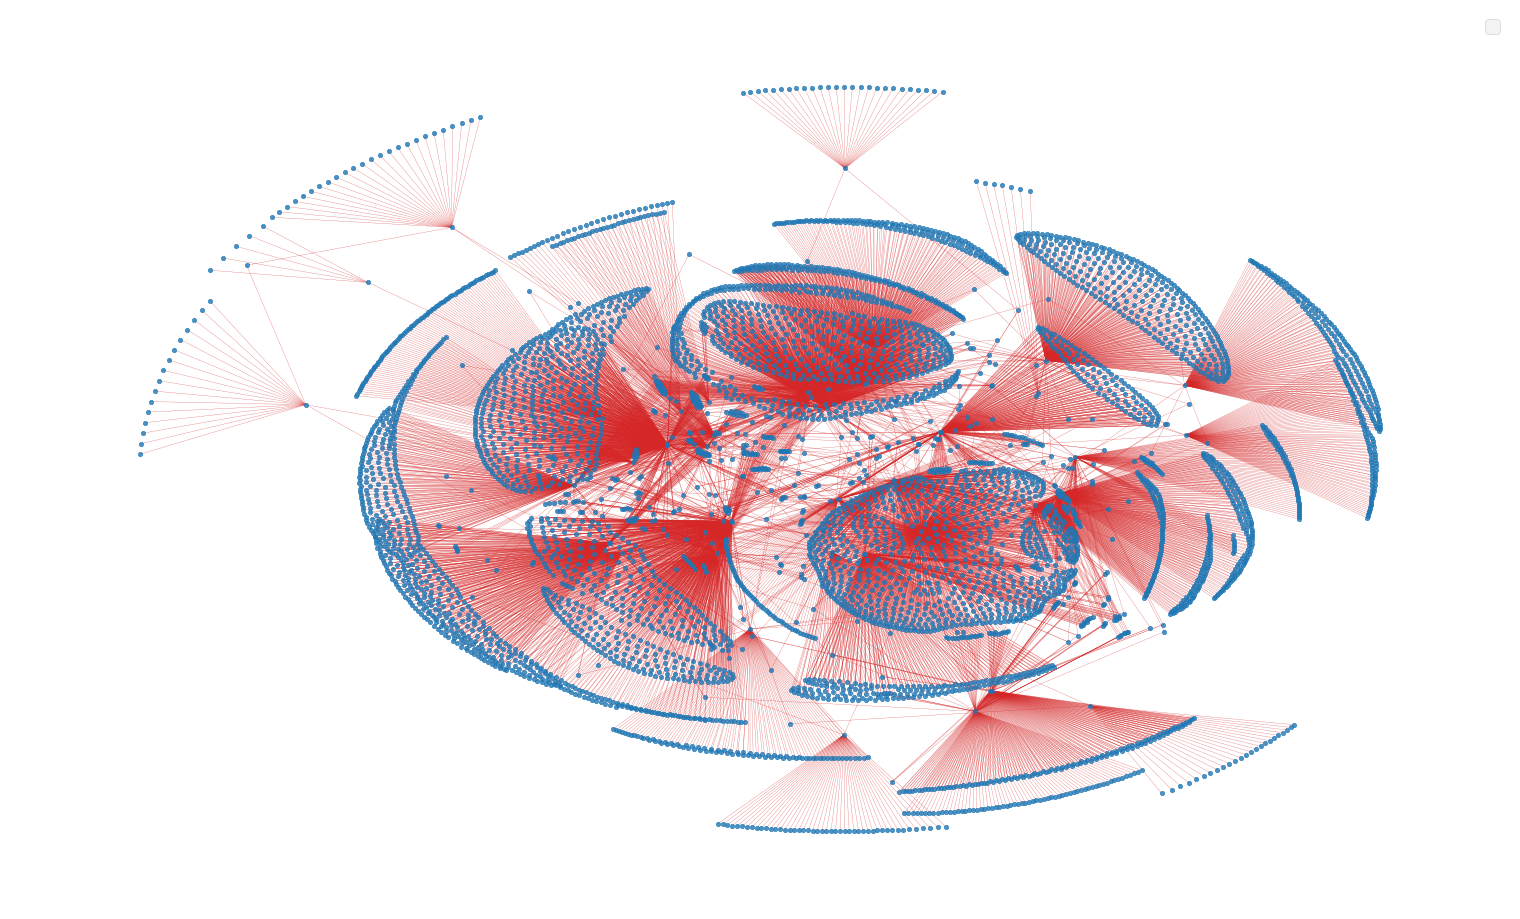

In [ ]:
df2 = df[0 : 10000]

##pd.set_option('precision',10)
G = nx.from_pandas_edgelist(df2, 'member1', 'member2', create_using = nx.Graph())

nodes = G.nodes()
degree = G.degree()
colors = [degree[n] for n in nodes]
#size = [(degree[n]) for n in nodes]

pos = nx.kamada_kawai_layout(G)
#pos = nx.spring_layout(G, k = 0.2)
cmap = plt.cm.viridis_r
cmap = plt.cm.Greys

vmin = min(colors)
vmax = max(colors)

fig = plt.figure(figsize = (15,9), dpi=100)

nx.draw(G,pos,alpha = 0.8, nodelist = nodes, node_color = 'tab:blue', node_size = 10, with_labels= False,font_size = 6, width = 0.2, cmap = cmap, edge_color ='tab:red')
fig.set_facecolor('#ffffff')

plt.legend()
plt.show()

In [ ]:
df3 = df

##pd.set_option('precision',10)
G = nx.from_pandas_edgelist(df3, 'member1', 'member2', create_using = nx.Graph())

for node in G.nodes():
    if (nx.triangles(G, node) > 1):
      print(nx.triangles(G, node))
print(0)

378
378
14086
532
378
378
4772
802
378
378
28986
499
2592
28604
378
378
378
622
378
1080
1240
378
378
378
378
2466
378
378
499
3828
3828
3828
4240
3828
3828
3828
3828
160135
3828
3828
3828
3828
3828
3828
3828
3828
3828
3828
3828
3828
3828
3828
3828
3828
3828
3828
3828
3828
3828
3828
3828
3828
133828
3828
80499
3828
3828
3828
3828
3828
3828
3828
3828
3828
3828
3828
3828
3828
3828
3828
3828
3828
3828
3828
3828
3828
3828
3828
3828
3828
3828
3828
8597
4613
3828
3828
3828
3828
3828
3828
3828
3856
3828
3828
3828
3828
3828
100859
3828
3828
3828
3828
3828
3828
3828
3828
3828
3828
1326
54404
15355
1326
1326
1326
1326
152299
7850
10132
1326
172302
1326
26140
160382
1326
1326
1326
127121
101586
1326
182073
1326
2693
121183
1326
68148
52478
1326
76640
112255
10318
1326
109161
1326
78782
1326


KeyboardInterrupt: 

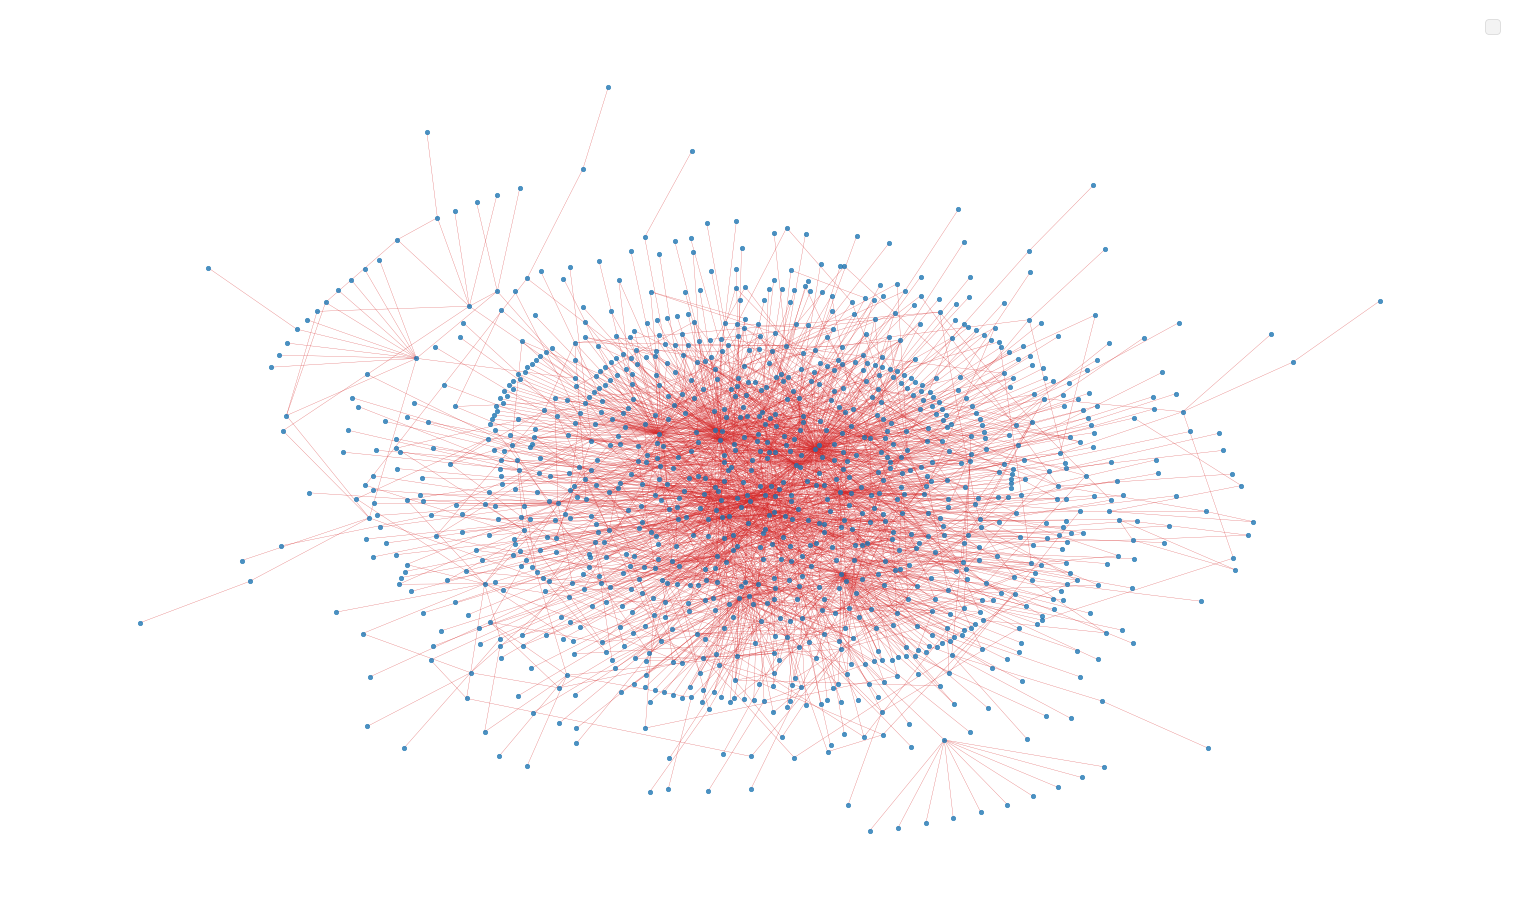

In [ ]:
df2 = df[0 : 5000]

G = read_dataframe_as_graph(df2);

##pd.set_option('precision',10)
##G = nx.from_pandas_edgelist(df2, 'member1', 'member2', create_using = nx.Graph())

nodes = G.nodes()
degree = G.degree()
colors = [degree[n] for n in nodes]
#size = [(degree[n]) for n in nodes]

pos = nx.kamada_kawai_layout(G)
#pos = nx.spring_layout(G, k = 0.2)
cmap = plt.cm.viridis_r
cmap = plt.cm.Greys

vmin = min(colors)
vmax = max(colors)

fig = plt.figure(figsize = (15,9), dpi=100)

nx.draw(G,pos,alpha = 0.8, nodelist = nodes, node_color = 'tab:blue', node_size = 10, with_labels= False,font_size = 6, width = 0.2, cmap = cmap, edge_color ='tab:red')
fig.set_facecolor('#ffffff')

plt.legend()
plt.show()